In [66]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import constants


L = 1e-9
m = constants.m_e # electron mass

x_nmax = 1001
x = np.linspace(-L,L,x_nmax)
dx = L/x_nmax #spatial discretization length

V_bar = 1e100
V = np.zeros(x.size)
for k in range(V.size):
    if (x[k] < -L/2. or x[k] > L/2.):
        V[k] = V_bar
        
k_grid = np.fft.fftfreq(x_nmax, d=dx)
T = k_grid * k_grid * constants.hbar * constants.hbar / (2.*m)


# plt.plot(x*1e9,V)
# plt.show()

### initial conditions
x_0 = L/5 #mean
sigma = L/50 #width
k = 50 * np.pi / L #mean momentum

init = np.exp(-0.25 * (x-x_0)**2 / sigma**2 )**2 * np.exp(1.j*k*x)
for k in range(init.size):
    if (x[k] < -L/2. or x[k] > L/2.):
        init[k] = 0. + 0.j
norm = (np.sum( np.abs(init)**2 )*dx)
init /= np.sqrt(norm)
# print(np.sum(np.abs(init)**2)*dx) # make sure the norm works

# plt.plot(x*1e9,V)
# plt.semilogy(x*1e9,np.abs(init)**2*1e-9)
# plt.show()

### integration time and number of samples
t_max = 0.1e-15 # e-15 -> femto seconds
t_nmax = 5000

t = np.linspace(0,t_max,t_nmax+1)
dt = t_max/t_nmax


prop_V = np.exp( (-1.j / constants.hbar) * V * dt)
prop_T = np.exp( (-1.j / constants.hbar) * T * dt)
    
Psi = np.zeros((t_nmax,x_nmax), dtype=complex)
Psi[0] = init

for k in range(1,t_nmax):
    Psi[k] = Psi[k-1] * prop_V
    Psi[k] = np.fft.fft(Psi[k])
    Psi[k] = Psi[k] * prop_T
    Psi[k] = np.fft.ifft(Psi[k])

Psi2 = np.abs(Psi)**2





(5000, 1001)


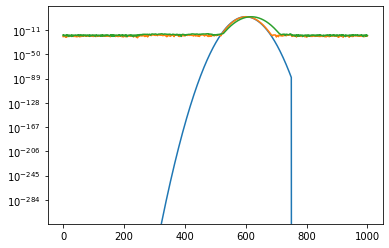

In [67]:
print(Psi2.shape)
# print(Psi2)
plt.semilogy(Psi2[0])
plt.semilogy(Psi2[100])
plt.semilogy(Psi2[999])
plt.show()

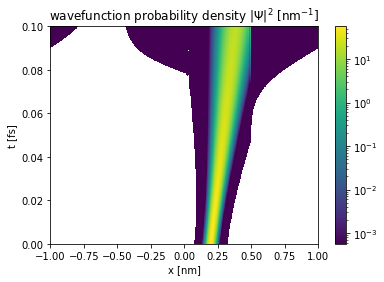

In [68]:
from matplotlib.colors import LogNorm
extent_ar = [-L*1e9, L*1e9, 0*1e15,t_max*1e15]
plt.imshow(Psi2*1e-9, aspect='auto', interpolation='none', origin='lower', norm=LogNorm(vmin=1e-5*Psi2.max()*1e-9), extent = extent_ar)
plt.xlabel('x [nm]')
plt.ylabel('t [fs]')
plt.title(r'wavefunction probability density $|\Psi|^2$ [nm$^{-1}$]')
plt.colorbar()
plt.show()